In [1]:
import pandas as pd
train = pd.read_csv('./data/48k_train_context.csv')


In [2]:
train.head(5)

,prompt,context,A,B,C,D,E
0,What is physical mathematics?,The subject of physical mathematics is concern...,The study of physically motivated mathematics,The study of mathematical physics,The study of mathematics in physical contexts,The study of mathematical equations,The study of mathematical operations
1,Who wrote Physical Arithmetic in 1885?,Philosophy of Arithmetic: Psychological and Lo...,Margaret Osler,Alexander Macfarlane,Alhazen,Galileo,Newton
2,What did the Mathematical Tripos at Cambridge ...,The undergraduate course of mathematics at Cam...,Pure mathematics,Applied mathematics,Mixed mathematics,Fluxional calculus,Physical problems
3,What mathematical representation is used for m...,"Kinematics, as a field of study, is often refe...",Complex numbers,Quaternions,Linear algebra,Fluxional calculus,Mixed mathematics
4,What did the early expressions of kinematics a...,"Kinematics, as a field of study, is often refe...",Causality,Forces,Mathematical physics,Fluxional calculus,Mixed mathematics


In [3]:
text = train['context'].apply(lambda x : x[:1750]) + train['prompt']

/root/conda_env/gaiic_2023_py37/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
/root/conda_env/gaiic_2023_py37/lib/python3.7/site-packages/transformers/convert_slow_tokenizer.py:455: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  "The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option"
Special to

<AxesSubplot:ylabel='Density'>

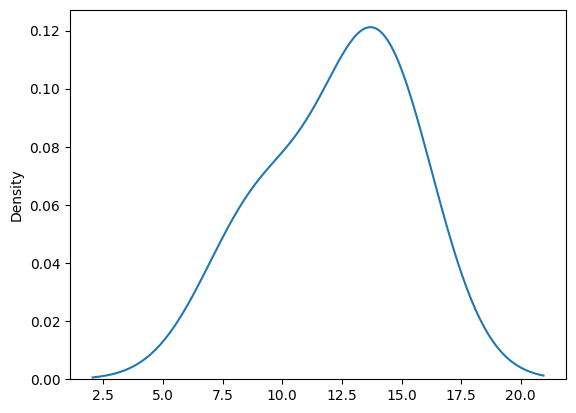

In [4]:
import seaborn as sns
lengths = [len(s) for s in text]
from transformers import AutoTokenizer
token = AutoTokenizer.from_pretrained('./pretrain_models/microsoft_deberta_large')
input_ids = token(list(text))
lengths = [len(x) for x in input_ids]
sns.kdeplot(lengths)

In [11]:

lengths = [len(x) for x in input_ids['input_ids']]
max(lengths)

797